In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [128]:
train=pd.read_csv("train.csv",index_col="id")
test=pd.read_csv("test.csv",index_col="id")
display(train.head())
display(test.head())
print(train["job"].value_counts())


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
id,,,,,,,,,,,,,,,,,
1,39,blue-collar,married,secondary,no,1756,yes,no,cellular,3,apr,939,1,-1,0,unknown,1
2,51,entrepreneur,married,primary,no,1443,no,no,cellular,18,feb,172,10,-1,0,unknown,1
3,36,management,single,tertiary,no,436,no,no,cellular,13,apr,567,1,595,2,failure,1
4,63,retired,married,secondary,no,474,no,no,cellular,25,jan,423,1,-1,0,unknown,1
5,31,management,single,tertiary,no,354,no,no,cellular,30,apr,502,1,9,2,success,1


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
id,,,,,,,,,,,,,,,,
1,30,management,single,tertiary,no,1028,no,no,cellular,4,feb,1294,2,-1,0,unknown
2,39,self-employed,single,tertiary,no,426,no,no,unknown,18,jun,1029,1,-1,0,unknown
3,38,technician,single,tertiary,no,-572,yes,yes,unknown,5,jun,26,24,-1,0,unknown
4,34,technician,single,secondary,no,-476,yes,no,unknown,27,may,92,4,-1,0,unknown
5,37,entrepreneur,married,primary,no,62,no,no,cellular,31,jul,404,2,-1,0,unknown


blue-collar      5886
management       5620
technician       4491
admin.           3085
services         2506
retired          1391
self-employed     945
entrepreneur      914
unemployed        790
housemaid         765
student           557
unknown           178
Name: job, dtype: int64


In [129]:
y_1=train[train["y"]==1]

In [130]:
y_0=train[train["y"]==0]

(array([194., 755., 838., 458., 384., 302., 118.,  83.,  34.,   8.]),
 array([18. , 25.5, 33. , 40.5, 48. , 55.5, 63. , 70.5, 78. , 85.5, 93. ]),
 <a list of 10 Patch objects>)

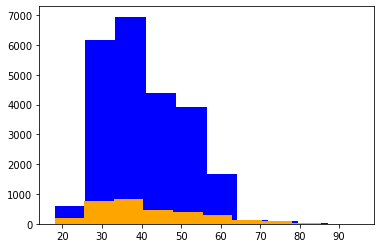

In [131]:
plt.hist(y_0["age"],color="blue")
plt.hist(y_1["age"],color="orange")

傾向：20~60歳までの人が口座を開設する

In [132]:
print(y_1.shape)
print(y_0.shape)

(3174, 17)
(23954, 17)


In [133]:
3174/23954

0.1325039659347082

In [303]:
y_1_get=pd.get_dummies(y_1)
y_train=y_1_get[["age","marital_single","contact_cellular","poutcome_success","duration","y"]]
y=y_train["y"]
X=sm.add_constant(y_train)
model=sm.OLS(y, X)
result=model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -633.6
Date:                Mon, 10 Feb 2020   Prob (F-statistic):               1.00
Time:                        11:53:18   Log-Likelihood:                 96646.
No. Observations:                3174   AIC:                        -1.933e+05
Df Residuals:                    3168   BIC:                        -1.932e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age               4.866e-16   2.28e-17  

C:\Users\masaharu\Anaconda3\envs\signate\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [306]:
train=pd.get_dummies(train)
display(train.head())

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
id,,,,,,,,,,,,,,,,,,,,,
1,39,1756,3,939,1,-1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
2,51,1443,18,172,10,-1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,36,436,13,567,1,595,2,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,63,474,25,423,1,-1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5,31,354,30,502,1,9,2,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [309]:
import statsmodels.formula.api as smf

In [312]:
def step_aic(model, exog, endog, **kwargs):
    """
    This select the best exogenous variables with AIC
    Both exog and endog values can be either str or list.
    (Endog list is for the Binomial family.)

    Note: This adopt only "forward" selection

    Args:
        model: model from statsmodels.formula.api
        exog (str or list): exogenous variables
        endog (str or list): endogenous variables
        kwargs: extra keyword argments for model (e.g., data, family)

    Returns:
        model: a model that seems to have the smallest AIC
    """

    # exog, endogは強制的にリスト形式に変換しておく
    exog = np.r_[[exog]].flatten()
    endog = np.r_[[endog]].flatten()
    remaining = set(exog)
    selected = []  # 採用が確定された要因

    # 定数項のみのAICを計算
    formula_head = ' + '.join(endog) + ' ~ '
    formula = formula_head + '1'
    aic = model(formula=formula, **kwargs).fit().aic
    print('AIC: {}, formula: {}'.format(round(aic, 3), formula))

    current_score, best_new_score = np.ones(2) * aic

    # 全要因を採択するか，どの要因を追加してもAICが上がらなければ終了
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:

            # 残っている要因を1つずつ追加したときのAICを計算
            formula_tail = ' + '.join(selected + [candidate])
            formula = formula_head + formula_tail
            aic = model(formula=formula, **kwargs).fit().aic
            print('AIC: {}, formula: {}'.format(round(aic, 3), formula))

            scores_with_candidates.append((aic, candidate))

        # 最もAICが小さかった要因をbest_candidateとする
        scores_with_candidates.sort()
        scores_with_candidates.reverse()
        best_new_score, best_candidate = scores_with_candidates.pop()

        # 候補要因追加でAICが下がったならば，それを確定要因として追加する
        if best_new_score < current_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score

    formula = formula_head + ' + '.join(selected)
    print('The best formula: {}'.format(formula))
    return model(formula, **kwargs).fit()

In [ ]:
model = step_aic(smf.ols,["age","balance","day","duration","campaign","pdays","previous","job_entrepreneur","job_housemaid","job_management","job_retired","job_services","job_unemployed","job_student","job_technician","marital_divorced","marital_married","marital_single","education_primary","education_secondary","education_tertiary","education_unknown","default_no","default_yes","housing_no","housing_yes","loan_no","loan_yes","contact_cellular","contact_telephone","contact_unknown","month_apr","month_aug","month_dec","month_feb","month_jan","month_jul","month_jun","month_mar","month_may","month_nov","month_oct","month_sep","poutcome_failure","poutcome_other","poutcome_success","poutcome_unknown"],["y"],data=train)

AIC: 15407.237, formula: y ~ 1
AIC: 15391.419, formula: y ~ job_unemployed
AIC: 15302.016, formula: y ~ marital_single
AIC: 15408.935, formula: y ~ month_aug
AIC: 14892.286, formula: y ~ contact_cellular
AIC: 14664.046, formula: y ~ poutcome_unknown
AIC: 15131.471, formula: y ~ pdays
AIC: 15403.215, formula: y ~ job_housemaid
AIC: 14962.306, formula: y ~ month_oct
AIC: 15401.283, formula: y ~ job_entrepreneur
AIC: 15217.944, formula: y ~ previous
AIC: 15360.077, formula: y ~ education_primary
AIC: 15383.057, formula: y ~ day
AIC: 15405.693, formula: y ~ education_unknown
AIC: 14957.276, formula: y ~ month_mar
AIC: 14869.871, formula: y ~ housing_no
AIC: 10643.369, formula: y ~ duration
AIC: 15397.394, formula: y ~ age
AIC: 15247.55, formula: y ~ job_retired
AIC: 15292.138, formula: y ~ loan_yes
AIC: 15375.204, formula: y ~ month_feb
AIC: 15313.426, formula: y ~ marital_married
AIC: 15377.061, formula: y ~ month_jul
AIC: 15393.666, formula: y ~ poutcome_other
AIC: 15388.848, formula: y 

In [307]:
"age","job","marital","education","default","balance","housing","loan","contact","day","month","duration","campaign","pdays","previous","poutcome"
train

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
id,,,,,,,,,,,,,,,,,,,,,
1,39,1756,3,939,1,-1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
2,51,1443,18,172,10,-1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,36,436,13,567,1,595,2,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,63,474,25,423,1,-1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5,31,354,30,502,1,9,2,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27124,42,1455,2,279,2,269,2,0,0,1,...,0,0,0,0,0,0,0,1,0,0
27125,34,719,15,362,3,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
27126,36,49,8,405,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1


In [134]:
#job serch
y_1_job=y_1[["job","age"]]
display(y_1_job)

,job,age
id,,
1,blue-collar,39
2,entrepreneur,51
3,management,36
4,retired,63
5,management,31
...,...,...
27075,unemployed,34
27090,management,50
27106,management,44


In [135]:
y_1_job=y_1_job[y_1_job["job"]!="unknown"]
display(y_1_job)

,job,age
id,,
1,blue-collar,39
2,entrepreneur,51
3,management,36
4,retired,63
5,management,31
...,...,...
27075,unemployed,34
27090,management,50
27106,management,44


In [136]:
y_1_job=pd.get_dummies(y_1_job)
display(y_1_job)

,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
id,,,,,,,,,,,,
1,39,0,1,0,0,0,0,0,0,0,0,0
2,51,0,0,1,0,0,0,0,0,0,0,0
3,36,0,0,0,0,1,0,0,0,0,0,0
4,63,0,0,0,0,0,1,0,0,0,0,0
5,31,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
27075,34,0,0,0,0,0,0,0,0,0,0,1
27090,50,0,0,0,0,1,0,0,0,0,0,0
27106,44,0,0,0,0,1,0,0,0,0,0,0


,job_admin.,age
id,,
9,1,31
13,1,34
32,1,52
79,1,51
187,1,40
...,...,...
26547,1,55
26562,1,34
26659,1,45


(array([17., 48., 91., 56., 35., 53., 25., 28., 28.,  4.]),
 array([21. , 25.4, 29.8, 34.2, 38.6, 43. , 47.4, 51.8, 56.2, 60.6, 65. ]),
 <a list of 10 Patch objects>)

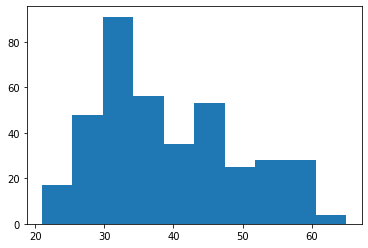

In [226]:
job_1=y_1_job[y_1_job["job_admin."]==1]
job_1=job_1[["job_admin.","age"]]
display(job_1[["job_admin.","age"]])
plt.hist(job_1["age"])

,job_blue-collar,age
id,,
1,1,39
6,1,29
15,1,38
19,1,46
35,1,29
...,...,...
26768,1,34
26879,1,27
26937,1,41


(array([23., 63., 68., 67., 52., 46., 47., 31., 19., 14.]),
 array([21. , 25.1, 29.2, 33.3, 37.4, 41.5, 45.6, 49.7, 53.8, 57.9, 62. ]),
 <a list of 10 Patch objects>)

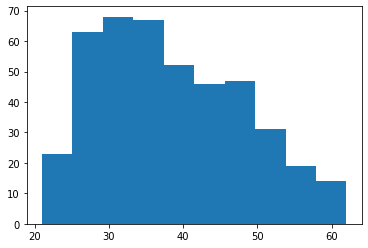

In [225]:
job_2=y_1_job[y_1_job["job_blue-collar"]==1]
job_2=job_2[["job_blue-collar","age"]]
display(job_2[["job_blue-collar","age"]])
plt.hist(job_2["age"])

,job_entrepreneur,age
id,,
2,1,51
731,1,50
1701,1,65
1737,1,42
1913,1,62
...,...,...
25865,1,33
26484,1,49
26660,1,63


(array([ 4., 14., 22., 16., 12.,  6.,  5.,  0.,  0.,  1.]),
 array([23. , 29.1, 35.2, 41.3, 47.4, 53.5, 59.6, 65.7, 71.8, 77.9, 84. ]),
 <a list of 10 Patch objects>)

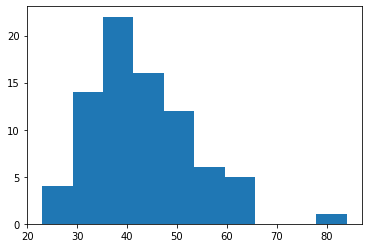

In [224]:
job_3=y_1_job[y_1_job["job_entrepreneur"]==1]
job_3=job_3[["job_entrepreneur","age"]]
display(job_3[["job_entrepreneur","age"]])
plt.hist(job_3["age"])

,job_housemaid,age
id,,
121,1,34
691,1,66
723,1,39
1033,1,80
2115,1,51
...,...,...
25538,1,23
25559,1,37
25889,1,59


(array([ 2.,  6., 11.,  4.,  9., 16., 11.,  5.,  1.,  3.]),
 array([22., 28., 34., 40., 46., 52., 58., 64., 70., 76., 82.]),
 <a list of 10 Patch objects>)

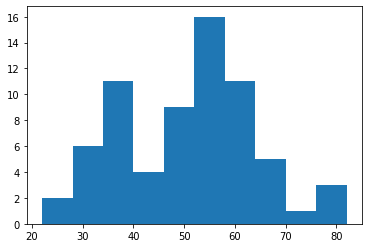

In [223]:
job_4=y_1_job[y_1_job["job_housemaid"]==1]
job_4=job_4[["job_housemaid","age"]]
display(job_4[["job_housemaid","age"]])
plt.hist(job_4["age"])

,job_management,age
id,,
3,1,36
5,1,31
14,1,31
17,1,62
23,1,42
...,...,...
26830,1,49
26908,1,30
27090,1,50


(array([ 46., 213., 177., 108.,  78.,  63.,  63.,  14.,   2.,   3.]),
 array([22. , 27.6, 33.2, 38.8, 44.4, 50. , 55.6, 61.2, 66.8, 72.4, 78. ]),
 <a list of 10 Patch objects>)

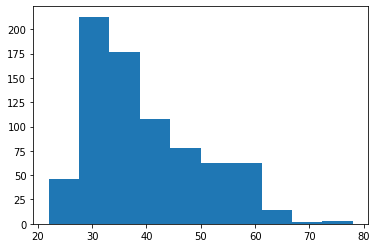

In [222]:
job_5=y_1_job[y_1_job["job_management"]==1]
job_5=job_5[["job_management","age"]]
display(job_5[["job_management","age"]])
plt.hist(job_5["age"])

,job_retired,age
id,,
4,1,63
18,1,66
256,1,61
295,1,73
366,1,64
...,...,...
26611,1,68
26710,1,61
26737,1,66


(array([ 1.,  1.,  3., 31., 85., 66., 65., 40., 15.,  4.]),
 array([34. , 39.9, 45.8, 51.7, 57.6, 63.5, 69.4, 75.3, 81.2, 87.1, 93. ]),
 <a list of 10 Patch objects>)

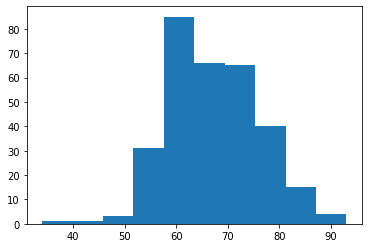

In [221]:
job_6=y_1_job[y_1_job["job_retired"]==1]
job_6=job_6[["job_retired","age"]]
display(job_6[["job_retired","age"]])
plt.hist(job_6["age"])

,job_self-employed,age
id,,
10,1,32
11,1,35
162,1,28
219,1,30
719,1,31
...,...,...
24739,1,42
26311,1,44
26554,1,28


(array([ 7., 44., 18., 13., 15.,  8.,  4.,  6.,  0.,  2.]),
 array([22. , 27.3, 32.6, 37.9, 43.2, 48.5, 53.8, 59.1, 64.4, 69.7, 75. ]),
 <a list of 10 Patch objects>)

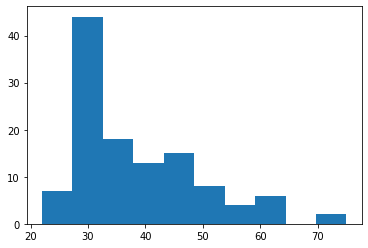

In [220]:
job_7=y_1_job[y_1_job["job_self-employed"]==1]
job_7=job_7[["job_self-employed","age"]]
display(job_7[["job_self-employed","age"]])
plt.hist(job_7["age"])

,job_services,age
id,,
7,1,37
55,1,49
220,1,30
245,1,27
348,1,25
...,...,...
26536,1,56
26575,1,25
26899,1,43


(array([19., 22., 47., 41., 25., 18., 11., 20., 13.,  8.]),
 array([22. , 25.8, 29.6, 33.4, 37.2, 41. , 44.8, 48.6, 52.4, 56.2, 60. ]),
 <a list of 10 Patch objects>)

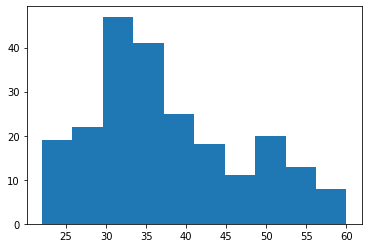

In [230]:
job_8=y_1_job[y_1_job["job_services"]==1]
job_8=job_8[["job_services","age"]]
display(job_8[["job_services","age"]])
plt.hist(job_8["age"])

,job_unemployed,age
id,,
209,1,45
453,1,49
852,1,30
953,1,31
1237,1,37
...,...,...
26321,1,31
26370,1,47
26694,1,40


(array([ 9., 23., 15., 16., 23., 14.,  8., 11.,  8.,  3.]),
 array([23. , 27.2, 31.4, 35.6, 39.8, 44. , 48.2, 52.4, 56.6, 60.8, 65. ]),
 <a list of 10 Patch objects>)

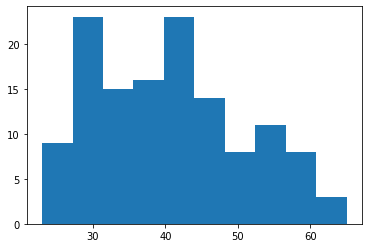

In [231]:
job_9=y_1_job[y_1_job["job_unemployed"]==1]
job_9=job_9[["job_unemployed","age"]]
display(job_9[["job_unemployed","age"]])
plt.hist(job_9["age"])

,job_student,age
id,,
140,1,28
240,1,28
241,1,29
258,1,22
324,1,25
...,...,...
26615,1,25
26812,1,21
26876,1,20


(array([21., 38., 41., 35., 15.,  5.,  6.,  4.,  0.,  1.]),
 array([18. , 20.8, 23.6, 26.4, 29.2, 32. , 34.8, 37.6, 40.4, 43.2, 46. ]),
 <a list of 10 Patch objects>)

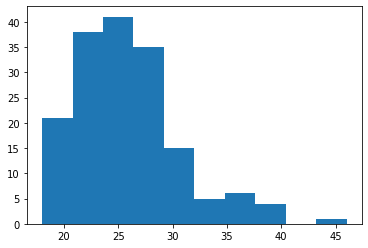

In [232]:
job_10=y_1_job[y_1_job["job_student"]==1]
job_10=job_10[["job_student","age"]]
display(job_10[["job_student","age"]])
plt.hist(job_10["age"])

,job_technician,age
id,,
8,1,32
12,1,34
16,1,71
285,1,36
335,1,44
...,...,...
26754,1,33
26757,1,34
26807,1,56


(array([ 28.,  80., 121.,  81.,  53.,  38.,  52.,  20.,   3.,   2.]),
 array([22. , 26.9, 31.8, 36.7, 41.6, 46.5, 51.4, 56.3, 61.2, 66.1, 71. ]),
 <a list of 10 Patch objects>)

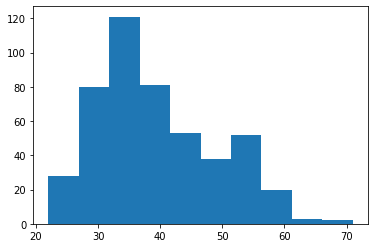

In [233]:
job_11=y_1_job[y_1_job["job_technician"]==1]
job_11=job_11[["job_technician","age"]]
display(job_11[["job_technician","age"]])
plt.hist(job_11["age"])


In [235]:
job_1.to_csv("job_1.csv")
job_2.to_csv("job_2.csv")
job_3.to_csv("job_3.csv")
job_4.to_csv("job_4.csv")
job_5.to_csv("job_5.csv")
job_6.to_csv("job_6.csv")
job_7.to_csv("job_7.csv")
job_8.to_csv("job_8.csv")
job_9.to_csv("job_9.csv")
job_10.to_csv("job_10.csv")
job_11.to_csv("job_11.csv")

In [157]:
def job_counts(x):
    result=[]
    for i in x:
        if i == 1:
            result.append(i)
          
    return result

In [158]:
job_1=job_counts(job_1)
print(job_1)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [236]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
import statsmodels.formula.api as smf
t=train[["age","job","marital","education","default","balance","housing","loan","contact","day","month","duration","campaign","pdays","previous","poutcome"]]
train1=pd.get_dummies(t)
y=train["y"]
X=sm.add_constant(train1)
model=sm.OLS(y, X)
result=model.fit()
print(result.summary())

C:\Users\masaharu\Anaconda3\envs\signate\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     281.5
Date:                Sun, 09 Feb 2020   Prob (F-statistic):               0.00
Time:                        08:34:54   Log-Likelihood:                -2790.0
No. Observations:               27128   AIC:                             5666.
Df Residuals:                   27085   BIC:                             6019.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0393    

marital

In [295]:
single=train1[train1["marital_single"]==1]
display(single["marital_single"].head())
print(single["marital_single"].shape)

id
3    1
5    1
6    1
8    1
9    1
Name: marital_single, dtype: uint8

(7662,)


In [297]:
married=train1[train1["marital_married"]==1]
display(married["marital_married"].head())
print(married["marital_married"].shape)

id
1     1
2     1
4     1
7     1
15    1
Name: marital_married, dtype: uint8

(16411,)


In [298]:
divorced=train1[train1["marital_divorced"]==1]
display(divorced["marital_divorced"].head())
print(divorced["marital_divorced"].shape)

id
12    1
14    1
24    1
26    1
28    1
Name: marital_divorced, dtype: uint8

(3055,)


In [268]:
y_1_month=pd.get_dummies(y_1["month"])
display(y_1_month)

,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
id,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
27075,0,0,0,1,0,0,0,0,0,0,0,0
27090,1,0,0,0,0,0,0,0,0,0,0,0
27106,0,0,0,0,0,0,0,0,0,0,1,0


In [270]:
apr=y_1_month[y_1_month["apr"]==1]
aug=y_1_month[y_1_month["aug"]==1]
dec=y_1_month[y_1_month["dec"]==1]
feb=y_1_month[y_1_month["feb"]==1]
jan=y_1_month[y_1_month["jan"]==1]
jul=y_1_month[y_1_month["jul"]==1]
jun=y_1_month[y_1_month["jun"]==1]
mar=y_1_month[y_1_month["mar"]==1]
may=y_1_month[y_1_month["may"]==1]
nov=y_1_month[y_1_month["nov"]==1]
oct=y_1_month[y_1_month["oct"]==1]
sep=y_1_month[y_1_month["sep"]==1]
"dec","feb","jan","jul","jun","mar","may","nov","oct","sep"

([array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0., 

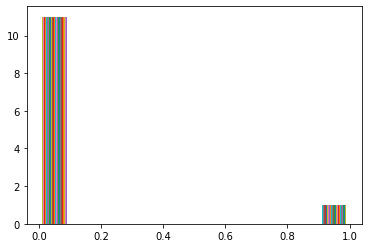

In [290]:
plt.hist(y_1_month)

,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
id,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0
16,1,0,0,0,0,0,0,0,0,0,0,0
99,1,0,0,0,0,0,0,0,0,0,0,0


(array([  0.,   0.,   0.,   0.,   0., 337.,   0.,   0.,   0.,   0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <a list of 10 Patch objects>)

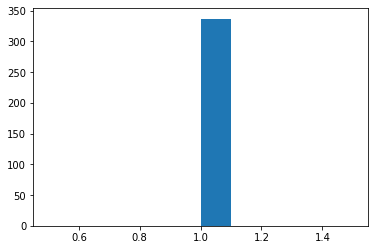

In [283]:
display(apr.head())
plt.hist(apr["apr"])

,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
id,,,,,,,,,,,,
10,0,1,0,0,0,0,0,0,0,0,0,0
11,0,1,0,0,0,0,0,0,0,0,0,0
13,0,1,0,0,0,0,0,0,0,0,0,0
17,0,1,0,0,0,0,0,0,0,0,0,0
55,0,1,0,0,0,0,0,0,0,0,0,0


(array([  0.,   0.,   0.,   0.,   0., 425.,   0.,   0.,   0.,   0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <a list of 10 Patch objects>)

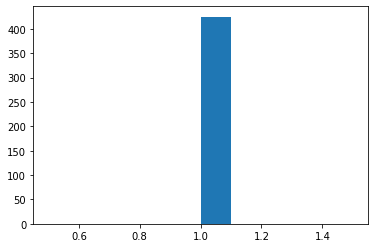

In [284]:
display(aug.head())
plt.hist(aug["aug"])

,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
id,,,,,,,,,,,,
1034,0,0,1,0,0,0,0,0,0,0,0,0
1328,0,0,1,0,0,0,0,0,0,0,0,0
1585,0,0,1,0,0,0,0,0,0,0,0,0
1879,0,0,1,0,0,0,0,0,0,0,0,0
3268,0,0,1,0,0,0,0,0,0,0,0,0


(array([ 0.,  0.,  0.,  0.,  0., 64.,  0.,  0.,  0.,  0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <a list of 10 Patch objects>)

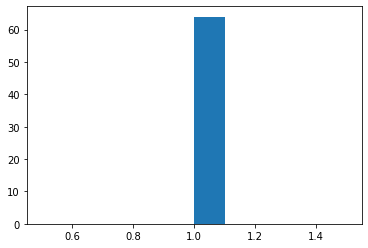

In [285]:
display(dec.head())
plt.hist(dec["dec"])

,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
id,,,,,,,,,,,,
2,0,0,0,1,0,0,0,0,0,0,0,0
32,0,0,0,1,0,0,0,0,0,0,0,0
209,0,0,0,1,0,0,0,0,0,0,0,0
216,0,0,0,1,0,0,0,0,0,0,0,0
240,0,0,0,1,0,0,0,0,0,0,0,0


(array([  0.,   0.,   0.,   0.,   0., 258.,   0.,   0.,   0.,   0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <a list of 10 Patch objects>)

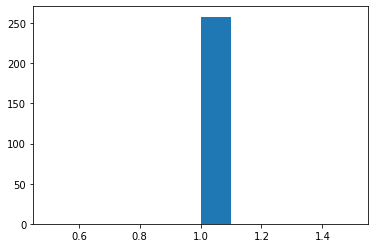

In [286]:
display(feb.head())
plt.hist(feb["feb"])

,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
id,,,,,,,,,,,,
4,0,0,0,0,1,0,0,0,0,0,0,0
258,0,0,0,0,1,0,0,0,0,0,0,0
453,0,0,0,0,1,0,0,0,0,0,0,0
626,0,0,0,0,1,0,0,0,0,0,0,0
634,0,0,0,0,1,0,0,0,0,0,0,0


([array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0., 

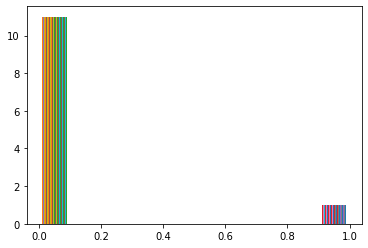

In [275]:
display(jan.head())
plt.hist(jan)

,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
id,,,,,,,,,,,,
18,0,0,0,0,0,1,0,0,0,0,0,0
23,0,0,0,0,0,1,0,0,0,0,0,0
241,0,0,0,0,0,1,0,0,0,0,0,0
245,0,0,0,0,0,1,0,0,0,0,0,0
260,0,0,0,0,0,1,0,0,0,0,0,0


([array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0., 

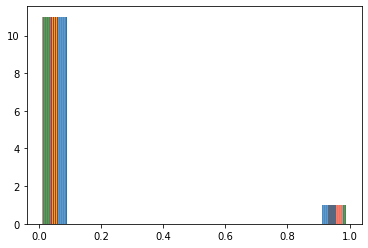

In [276]:
display(jul.head())
plt.hist(jul)

,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
id,,,,,,,,,,,,
6,0,0,0,0,0,0,1,0,0,0,0,0
15,0,0,0,0,0,0,1,0,0,0,0,0
144,0,0,0,0,0,0,1,0,0,0,0,0
173,0,0,0,0,0,0,1,0,0,0,0,0
307,0,0,0,0,0,0,1,0,0,0,0,0


([array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0., 

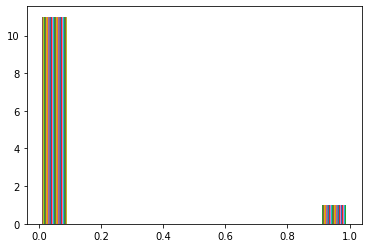

In [277]:
display(jun.head())
plt.hist(jun)

,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
id,,,,,,,,,,,,
14,0,0,0,0,0,0,0,1,0,0,0,0
256,0,0,0,0,0,0,0,1,0,0,0,0
1021,0,0,0,0,0,0,0,1,0,0,0,0
1159,0,0,0,0,0,0,0,1,0,0,0,0
1441,0,0,0,0,0,0,0,1,0,0,0,0


([array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0., 

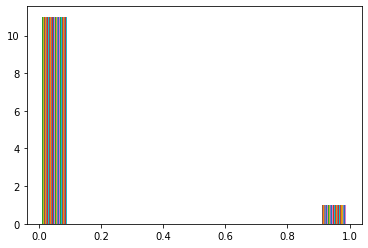

In [278]:
display(mar.head())
plt.hist(mar)

,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
id,,,,,,,,,,,,
8,0,0,0,0,0,0,0,0,1,0,0,0
9,0,0,0,0,0,0,0,0,1,0,0,0
12,0,0,0,0,0,0,0,0,1,0,0,0
19,0,0,0,0,0,0,0,0,1,0,0,0
35,0,0,0,0,0,0,0,0,1,0,0,0


([array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0., 

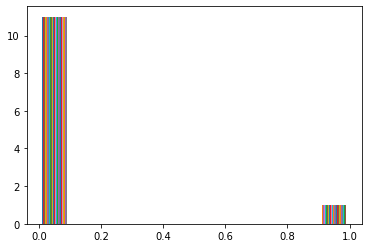

In [279]:
display(may.head())
plt.hist(may)

,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
id,,,,,,,,,,,,
162,0,0,0,0,0,0,0,0,0,1,0,0
394,0,0,0,0,0,0,0,0,0,1,0,0
522,0,0,0,0,0,0,0,0,0,1,0,0
696,0,0,0,0,0,0,0,0,0,1,0,0
706,0,0,0,0,0,0,0,0,0,1,0,0


([array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0., 

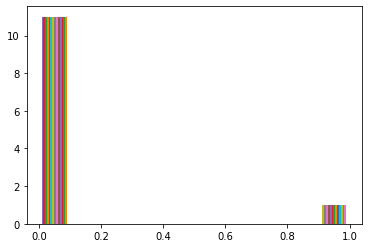

In [280]:
display(nov.head())
plt.hist(nov)

,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
id,,,,,,,,,,,,
95,0,0,0,0,0,0,0,0,0,0,1,0
140,0,0,0,0,0,0,0,0,0,0,1,0
349,0,0,0,0,0,0,0,0,0,0,1,0
427,0,0,0,0,0,0,0,0,0,0,1,0
488,0,0,0,0,0,0,0,0,0,0,1,0


([array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0., 

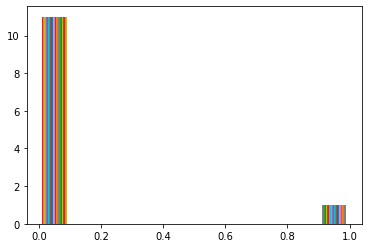

In [281]:
display(oct.head())
plt.hist(oct)

,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
id,,,,,,,,,,,,
7,0,0,0,0,0,0,0,0,0,0,0,1
219,0,0,0,0,0,0,0,0,0,0,0,1
295,0,0,0,0,0,0,0,0,0,0,0,1
544,0,0,0,0,0,0,0,0,0,0,0,1
827,0,0,0,0,0,0,0,0,0,0,0,1


([array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0., 

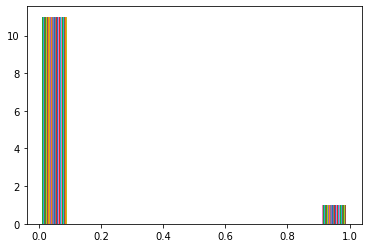

In [282]:
display(sep.head())
plt.hist(sep)